## Linear Model Structures

We will begin our study of data structures by considering four simple but very powerful concepts. Stacks, queues, deques, and lists are examples of data collections whose items are ordered depending on how they are added or removed. Once an item is added, it stays in that position relative to the other elements that came before and came after it. Collections such as these are often referred to as linear data structures.

Linear structures can be thought of as having two ends. Sometimes these ends are referred to as the “left” and the “right” or in some cases the “front” and the “rear.” You could also call them the “top” and the “bottom.” The names given to the ends are not significant. What distinguishes one linear structure from another is the way in which items are added and removed, in particular the location where these additions and removals occur. For example, a structure might allow new items to be added at only one end. Some structures might allow items to be removed from either end.

## Stack

A stack (sometimes called a “push-down stack”) is an ordered collection of items where the addition of new items and the removal of existing items always takes place at the same end. This end is commonly referred to as the “top.” The end opposite the top is known as the “base.”

The base of the stack is significant since items stored in the stack that are closer to the base represent those that have been in the stack the longest. The most recently added item is the one that is in position to be removed first. This ordering principle is sometimes called __LIFO, last-in first-out__. It provides an ordering based on length of time in the collection. Newer items are near the top, while older items are near the base.

One of the most useful ideas related to stacks comes from the simple observation of items as they are added and then removed. Assume you start out with a clean desktop. Now place books one at a time on top of each other. You are constructing a stack. Consider what happens when you begin removing books. The order that they are removed is exactly the reverse of the order that they were placed. Stacks are fundamentally important, as they can be used to reverse the order of items. The order of insertion is the reverse of the order of removal. 
the figure shows the Python data object stack as it was created and then again as items are removed. Note the order of the objects.

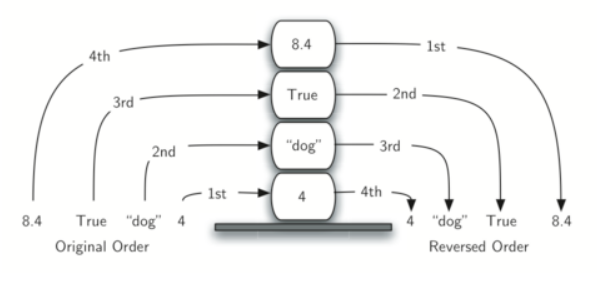

Considering this reversal property, you can perhaps think of examples of stacks that occur as you use your computer. For example, every web browser has a Back button. As you navigate from web page to web page, those pages are placed on a stack (actually it is the URLs that are going on the stack). The current page that you are viewing is on the top and the first page you looked at is at the base. If you click on the Back button, you begin to move in reverse order through the pages.

### Stack Abstract Data Type

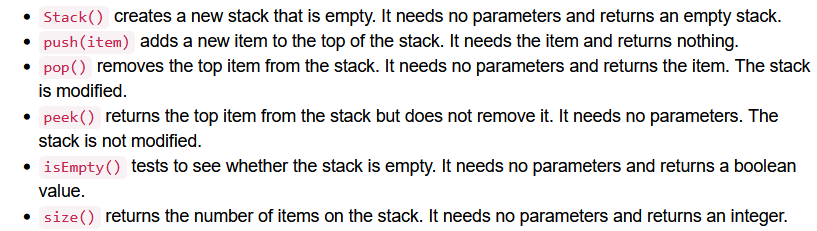

Creating a stack object in Python:

In [1]:
class Stack():
    
    def __init__(self):
        self.items = []
    
    def isEmpty(self):
        return self.items == []
    
    def push(self,item):
        self.items.append(item)
        
    def pop(self):
        return self.items.pop()
    
    def peek(self):
        return self.items[-1]
    
    def size(self):
        return len(self.items)
        

In [2]:
def revstring(mystr):
    stack = Stack()
    for i in mystr:
        stack.push(i)
    rev = ''
    for j in mystr:
        rev += stack.pop()
    return rev
        
        

#### simple balanced parenthesis

In [7]:
def parenthesis(order:str) -> bool:
    
    stack = Stack()
    
    for i in order:
        
        if stack.isEmpty() and i == ')':
            return False
        
        if i == '(':
            stack.push(i)
        
        else:
            stack.pop()
    
    return stack.isEmpty()
    
    

In [13]:
parenthesis('(()()(()')

False

#### balanced symbols ( [ {

In [53]:
def balance_symbols(order:list) -> bool:
    
    stack = Stack()
    
    rules_dict = {
        '(':')',
        '[':']',
        '{':'}'
    }
    for i in order:
        
        if stack.isEmpty() and i in ')]}':
            return False
        
        if i in ('([{'):
            stack.push(i)
        else:
            if rules_dict[stack.peek()] != i:
                return False
            
            else:
                stack.pop()
                
                
    return stack.isEmpty()
        
        

In [59]:
balance_symbols('[ { ( ) ]'.split(' '))

False

In [78]:
def to_binary(x):
    binar = []
    
    while True:
        binar.append(x%2)
        if x//2 == 0:
            return binar
        
        x //= 2
    

In [87]:
def to_octal(x):
    binar = []
    
    while True:
        binar.append(x%8)
        if x//8 == 0:
            return binar
        
        x //= 8

In [103]:
def to_hexadecimal(x):
    binar = []
    
    while True:
        binar.append(x%16)
        if x//16 == 0:
            return binar
        
        x //= 16
    
    return binar

## Queue

A queue is an ordered collection of items where the addition of new items happens at one end, called the “rear,” and the removal of existing items occurs at the other end, commonly called the “front.” As an element enters the queue it starts at the rear and makes its way toward the front, waiting until that time when it is the next element to be removed.

The most recently added item in the queue must wait at the end of the collection. The item that has been in the collection the longest is at the front. This ordering principle is sometimes called __FIFO, first-in first-out__. It is also known as “first-come first-served.”

A common example of Queue for Computer Science: our computer laboratory has 30 computers networked with a single printer. When students want to print, their print tasks “get in line” with all the other printing tasks that are waiting. The first task in is the next to be completed. If you are last in line, you must wait for all the other tasks to print ahead of you. We will explore this interesting example in more detail later.

In addition to printing queues, operating systems use a number of different queues to control processes within a computer. The scheduling of what gets done next is typically based on a queuing algorithm that tries to execute programs as quickly as possible and serve as many users as it can. Also, as we type, sometimes keystrokes get ahead of the characters that appear on the screen. This is due to the computer doing other work at that moment. The keystrokes are being placed in a queue-like buffer so that they can eventually be displayed on the screen in the proper order.

### Queue Abstract Data Dype

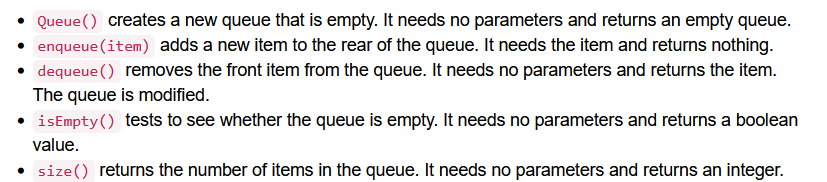

In [112]:
class Queue:
    
    def __init__(self,items = []):
        self.items = items
        
    def enqueue(self,item):
        self.items.append(item)
        
    def dequeue(self):
        return self.items.pop(0)
    
    def isEmpty(self):
        return self.items == []
    
    def size(self):
        return len(self.items)

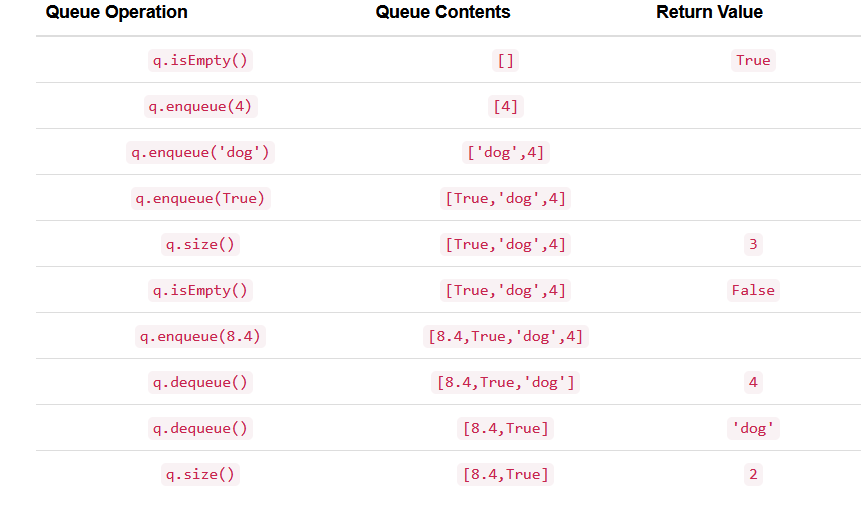

In [110]:
def hot_potato(l:list, num: int) -> list:
    
    while len(l) > 1:
        if len(l) >= num:
            l.pop(num-1)
        
        else:
            
            l.pop(num%len(l)-1)
            
    return l
            

In [111]:
hot_potato(['a','b','c','d'],4)

['b']

#### hot potato in a queue

In [120]:
test = Queue()

In [121]:
for i in 'abcd':
    test.enqueue(i)

In [115]:
queue.size()

4

In [119]:
def hot_potato2(queue:list,num:int) -> int:
    
    counter = 0
    while queue.size() > 1:
        counter += 1
        
        if counter == num:
            counter = 0 
            queue.dequeue()
            continue
        queue.enqueue(queue.dequeue())
    return queue
        
    
    

#### Printing Tasks 

## Deque

A deque, also known as a double-ended queue, is an ordered collection of items similar to the queue. It has two ends, a front and a rear, and the items remain positioned in the collection. What makes a deque different is the unrestrictive nature of adding and removing items. New items can be added at either the front or the rear. Likewise, existing items can be removed from either end. In a sense, this hybrid linear structure provides all the capabilities of stacks and queues in a single data structure. Figure below shows a deque of Python data objects.

It is important to note that even though the deque can assume many of the characteristics of stacks and queues, it does not require the LIFO and FIFO orderings that are enforced by those data structures. It is up to you to make consistent use of the addition and removal operations.

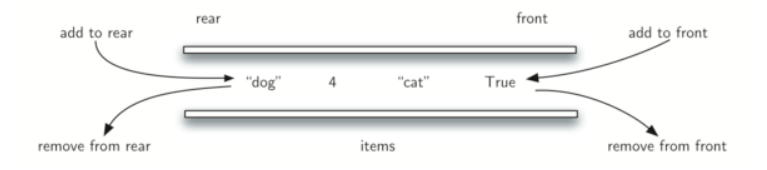

## The Deque Abstract Data Type

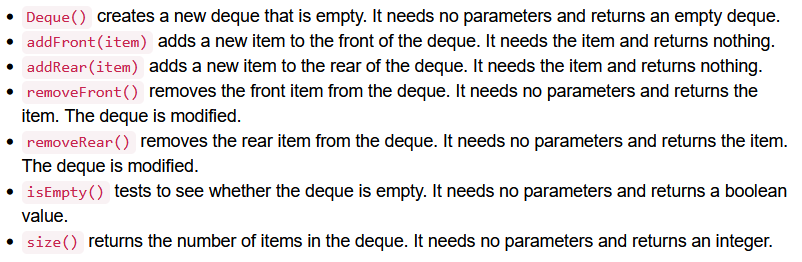

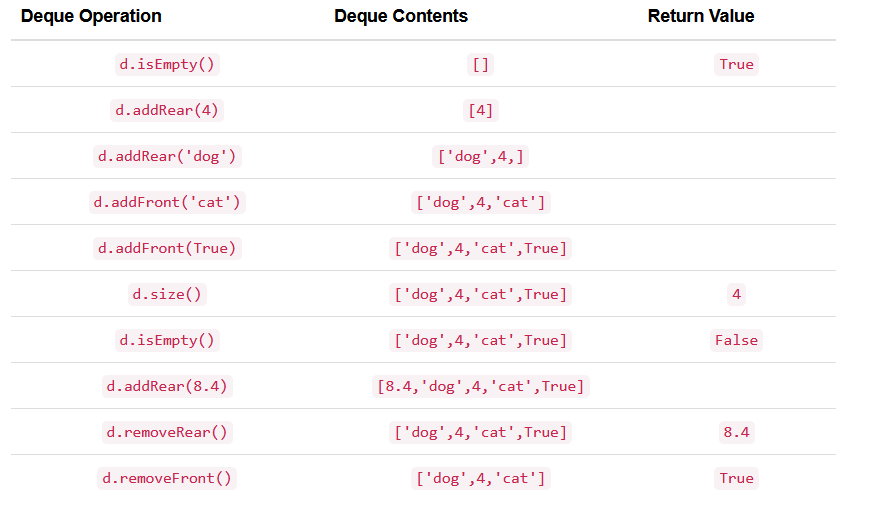

In [1]:
class Deque:

    def __init__(self):

        self.items = []


    def isEmpty(self):

        return self.items == []


    def addFront(self, item):

        self.items.append(item)


    def addRear(self, item):

        self.items.insert(0,item)


    def removeFront(self):

        return self.items.pop()


    def removeRear(self):

        return self.items.pop(0)


    def size(self):

        return len(self.items)

#### Palindrome with Deque

In [2]:
deque = Deque()

In [5]:
def is_palindrome(word:str) -> bool:
    
    deque = Deque()
    
    for i in word:
        deque.addFront(i)
        
    while deque.size() > 1:
        first = deque.removeRear()
        last = deque.removeFront()
        
        if first != last:
            return False
    
    return True
            

In [12]:
is_palindrome('saas')

True

## Lists

Throughout the discussion of basic data structures, we have used Python lists to implement the abstract data types presented. The list is a powerful, yet simple, collection mechanism that provides the programmer with a wide variety of operations. However, not all programming languages include a list collection. In these cases, the notion of a list must be implemented by the programmer.

A list is a collection of items where each item holds a relative position with respect to the others. More specifically, we will refer to this type of list as an unordered list. We can consider the list as having a first item, a second item, a third item, and so on. We can also refer to the beginning of the list (the first item) or the end of the list (the last item). For simplicity we will assume that lists cannot contain duplicate items.

For example, the collection of integers 54, 26, 93, 17, 77, and 31 might represent a simple unordered list of exam scores. Note that we have written them as comma-delimited values, a common way of showing the list structure. Of course, Python would show this list as [54,26,93,17,77,31]
.

### Unordered List Abstract Data Type

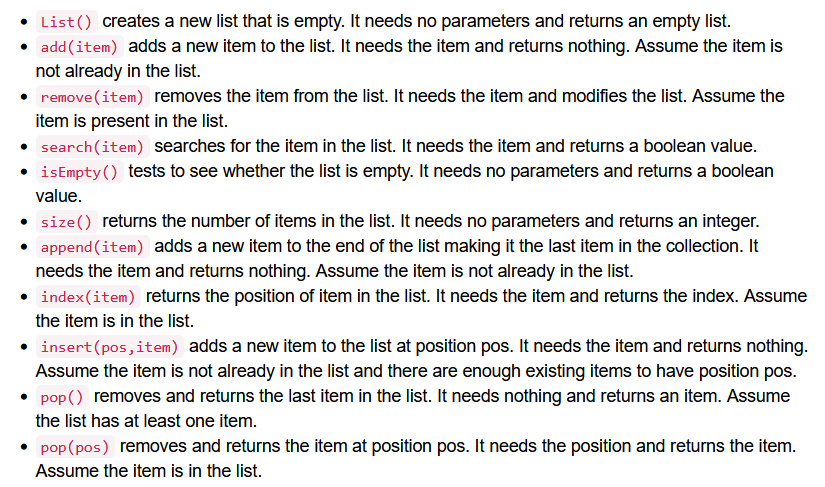

### Implementing an Unordered List: Linked Lists

It is important to note that the location of the first item of the list must be explicitly specified. Once we know where the first item is, the first item can tell us where the second is, and so on. The external reference is often referred to as the head of the list. Similarly, the last item needs to know that there is no next item.

#### The Node Class

The basic building block for the linked list implementation is the node. Each node object must hold at least two pieces of information. First, the node must contain the list item itself. We will call this the data field of the node. In addition, each node must hold a reference to the next node. Listing 1 shows the Python implementation. To construct a node, you need to supply the initial data value for the node. Evaluating the assignment statement below will yield a node object containing the value 93. You should note that we will typically represent a node object as shown in figure below. The Node class also includes the usual methods to access and modify the data and the next reference.

In [13]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext

In [10]:
temp = Node(93)

In [11]:
temp.getData()

93

The special Python reference value None will play an important role in the Node class and later in the linked list itself. A reference to None will denote the fact that there is no next node. Note in the constructor that a node is initially created with next set to None. Since this is sometimes referred to as “grounding the node,” we will use the standard ground symbol to denote a reference that is referring to None. It is always a good idea to explicitly assign None to your initial next reference values.

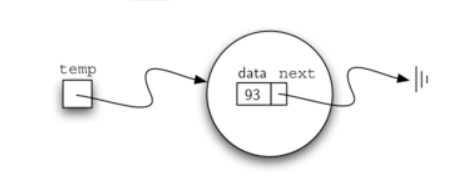



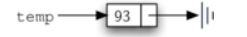

### Unordered List class

As we suggested above, the unordered list will be built from a collection of nodes, each linked to the next by explicit references. As long as we know where to find the first node (containing the first item), each item after that can be found by successively following the next links. With this in mind, the UnorderedList class must maintain a reference to the first node. The code below shows the constructor. Note that each list object will maintain a single reference to the head of the list.

In [19]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
        
    def size(self):

        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()
            
        return count
    def search(self,item):

        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()
                
        return found

    def remove(self,item):

        current = self.head
        previous = None
        found = False

        while not found:
            
            if current.getData() == item:
                found = True

            else:
                previous = current
                current = current.getNext()

        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())

In [20]:
mylist = UnorderedList()

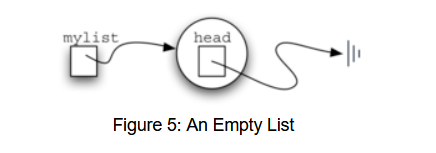

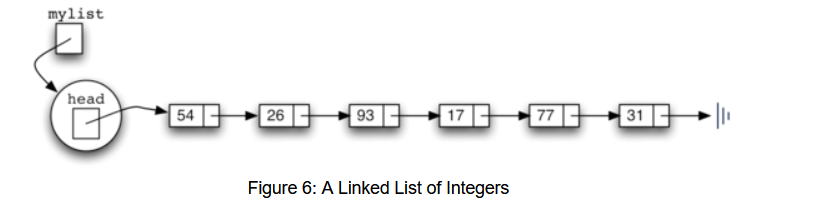

The isEmpty method, shown in the function isEmpty(), simply checks to see if the head of the list is a reference to None. The result of the boolean expression self.head==None will only be true if there are no nodes in the linked list. Since a new list is empty, the constructor and the check for empty must be consistent with one another. This shows the advantage to using the reference None to denote the “end” of the linked structure. In Python, None can be compared to any reference. Two references are equal if they both refer to the same object. We will use this often in our remaining methods.

So, how do we get items into our list? We need to implement the add method. However, before we can do that, we need to address the important question of where in the linked list to place the new item. Since this list is unordered, the specific location of the new item with respect to the other items already in the list is not important. The new item can go anywhere. With that in mind, it makes sense to place the new item in the easiest location possible.

Recall that the linked list structure provides us with only one entry point, the head of the list. All of the other nodes can only be reached by accessing the first node and then following next links. This means that the easiest place to add the new node is right at the head, or beginning, of the list. In other words, we will make the new item the first item of the list and the existing items will need to be linked to this new first item so that they follow.

In [9]:
def add(self,item):
    temp = Node(item)
    temp.setNext(self.head)
    self.head = temp

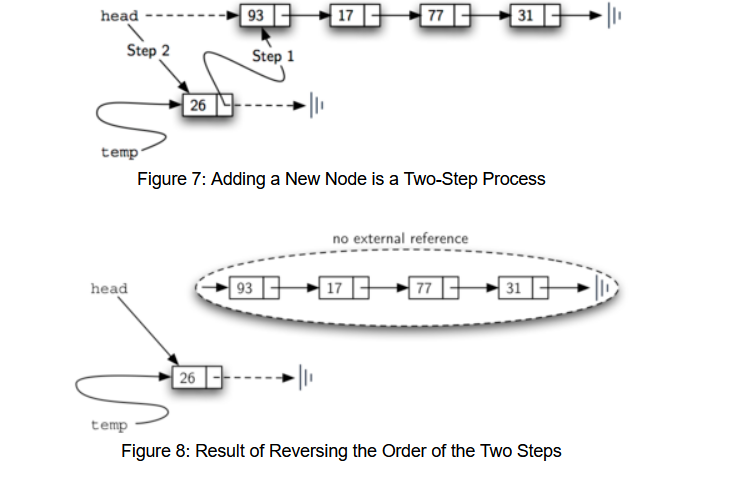

In [21]:
mylist.add(31)

mylist.add(77)

mylist.add(17)

mylist.add(93)

mylist.add(26)

mylist.add(54)

The next methods that we will implement–size, search, and remove–are all based on a technique known as linked list traversal. Traversal refers to the process of systematically visiting each node. To do this we use an external reference that starts at the first node in the list. As we visit each node, we move the reference to the next node by “traversing” the next reference.

To implement the size method, we need to traverse the linked list and keep a count of the number of nodes that occurred. Listing 5 shows the Python code for counting the number of nodes in the list. The external reference is called current and is initialized to the head of the list in line 2. At the start of the process we have not seen any nodes so the count is set to
. Lines 4–6 actually implement the traversal. As long as the current reference has not seen the end of the list (None), we move current along to the next node via the assignment statement in line 6. Again, the ability to compare a reference to None is very useful. Every time current moves to a new node, we add to count. Finally, count gets returned after the iteration stops. Figure 9 shows this process as it proceeds down the list.

In [ ]:
def size(self):

    current = self.head

    count = 0

    while current != None:

        count = count + 1

        current = current.getNext()


    return count

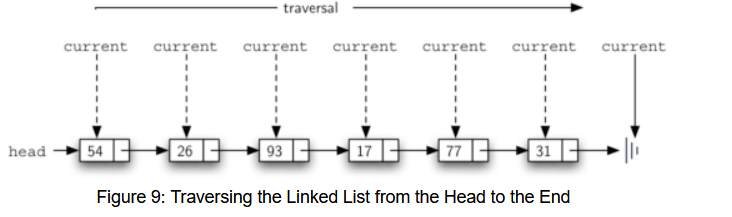

Searching for a value in a linked list implementation of an unordered list also uses the traversal technique. As we visit each node in the linked list we will ask whether the data stored there matches the item we are looking for. In this case, however, we may not have to traverse all the way to the end of the list. In fact, if we do get to the end of the list, that means that the item we are looking for must not be present. Also, if we do find the item, there is no need to continue.

Listing 6 shows the implementation for the search method. As in the size method, the traversal is initialized to start at the head of the list (line 2). We also use a boolean variable called found to remember whether we have located the item we are searching for. Since we have not found the item at the start of the traversal, found can be set to False (line 3). The iteration in line 4 takes into account both conditions discussed above. As long as there are more nodes to visit and we have not found the item we are looking for, we continue to check the next node. The question in line 5 asks whether the data item is present in the current node. If so, found can be set to True.

In [17]:
def search(self,item):

    current = self.head

    found = False

    while current != None and not found:

        if current.getData() == item:

            found = True

        else:

            current = current.getNext()


    return found

In [22]:
mylist.search(17)

True

The remove method requires two logical steps. First, we need to traverse the list looking for the item we want to remove. Once we find the item (recall that we assume it is present), we must remove it. The first step is very similar to search. Starting with an external reference set to the head of the list, we traverse the links until we discover the item we are looking for. Since we assume that item is present, we know that the iteration will stop before current gets to None. This means that we can simply use the boolean found in the condition.

When found becomes True, current will be a reference to the node containing the item to be removed. But how do we remove it? One possibility would be to replace the value of the item with some marker that suggests that the item is no longer present. The problem with this approach is the number of nodes will no longer match the number of items. It would be much better to remove the item by removing the entire node.

In order to remove the node containing the item, we need to modify the link in the previous node so that it refers to the node that comes after current. Unfortunately, there is no way to go backward in the linked list. Since current refers to the node ahead of the node where we would like to make the change, it is too late to make the necessary modification.

The solution to this dilemma is to use two external references as we traverse down the linked list. current will behave just as it did before, marking the current location of the traverse. The new reference, which we will call previous, will always travel one node behind current. That way, when current stops at the node to be removed, previous will be referring to the proper place in the linked list for the modification.

Listing 7 shows the complete remove method. Lines 2–3 assign initial values to the two references. Note that current starts out at the list head as in the other traversal examples. previous, however, is assumed to always travel one node behind current. For this reason, previous starts out with a value of None since there is no node before the head (see Figure 11). The boolean variable found will again be used to control the iteration.

In lines 6–7 we ask whether the item stored in the current node is the item we wish to remove. If so, found can be set to True. If we do not find the item, previous and current must both be moved one node ahead. Again, the order of these two statements is crucial. previous must first be moved one node ahead to the location of current. At that point, current can be moved. This process is often referred to as “inch-worming” as previous must catch up to current before current moves ahead. Figure 12 shows the movement of previous and current as they progress down the list looking for the node containing the value 17.

In [23]:
def remove(self,item):

    current = self.head

    previous = None

    found = False

    while not found:

        if current.getData() == item:

            found = True

        else:

            previous = current

            current = current.getNext()


    if previous == None:

        self.head = current.getNext()

    else:

        previous.setNext(current.getNext())

### Orderder List Class

The structure of an ordered list is a collection of items where each item holds a relative position that is based upon some underlying characteristic of the item. The ordering is typically either ascending or descending and we assume that list items have a meaningful comparison operation that is already defined. Many of the ordered list operations are the same as those of the unordered list.

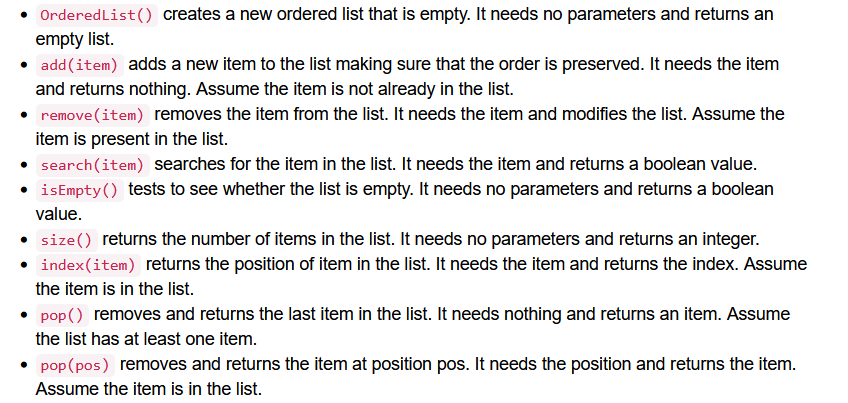

### Analysis of Linked Lists

To analyze the complexity of the linked list operations, we need to consider whether they require traversal. Consider a linked list that has n nodes. The isEmpty method is O(1) since it requires one step to check the head reference for None. size, on the other hand, will always require n steps since there is no way to know how many nodes are in the linked list without traversing from head to end. Therefore, length is O(n) . Adding an item to an unordered list will always be O(1) since we simply place the new node at the head of the linked list. However, search and remove, as well as add for an ordered list, all require the traversal process. Although on average they may need to traverse only half of the nodes, these methods are all O(n), since in the worst case each will process every node in the list.

You may also have noticed that the performance of this implementation differs from the actual performance given earlier for Python lists. This suggests that linked lists are not the way Python lists are implemented. The actual implementation of a Python list is based on the notion of an array. We discuss this in more detail in Chapter 8.

#### Summary

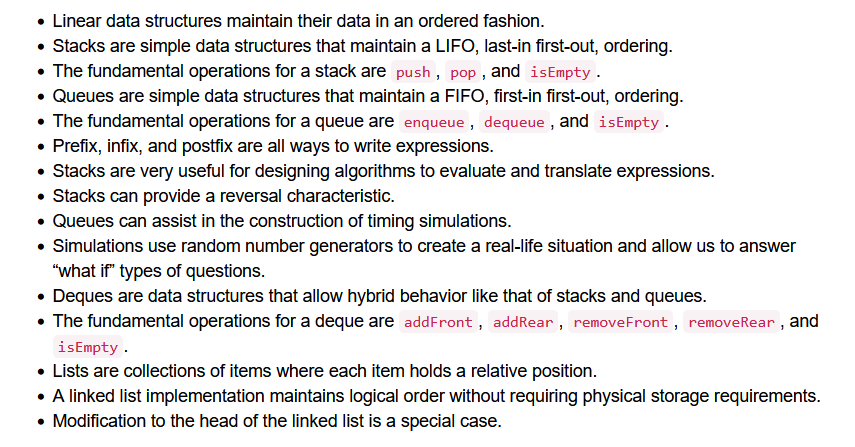